<a href="https://colab.research.google.com/github/lapshinaaa/homework_machineLearning/blob/main/hw04_knn_linreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Интеллектуальный анализ данных – весна 2023
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [82]:
X.isnull().values.any() # check for missing values
# output: False -> no missing values found

# selecting only categorical data:
cat_data = X.select_dtypes(['category', 'object']).columns
print(cat_data) # no categorical data found

Index([], dtype='object')


**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [83]:
from sklearn.model_selection import train_test_split

np.random.seed(35)  # fixating random seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 35) # splitting all the data

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [85]:
# selecting the features of our interest:
selected_features = ['alcohol', 'magnesium']
X_train_selected = X_train.loc[:, selected_features]
X_test_selected = X_test.loc[:, selected_features]

# scaling the features in the dataframe:
normalizer = StandardScaler() 
X_train_normalized = normalizer.fit_transform(X_train_selected)
X_test_normalized = normalizer.transform(X_test_selected) # calling fit on only training part(!)

# creating new data frames based on this data:
X_train_scaled = pd.DataFrame(data = X_train_normalized)
X_test_scaled = pd.DataFrame(data = X_test_normalized)

k_values = [1, 3, 5, 10, 15, 25]
knn_classifiers = []  # a list of classifiers that I'll further use in tasks

# creating a dictionary to store all the results
result = {'NN': k_values, 'Train': [], 'Test': []}

# training a new classifier for each of the K value in the array:
for k in k_values:
  knn_classifier = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
  knn_classifier.fit(X_train_scaled, y_train)
  knn_classifiers.append(knn_classifier)

# loop over the classifiers
for i, classifier in enumerate(knn_classifiers):
  result['Train'].append(classifier.score(X_train_scaled, y_train))
  result['Test'].append(classifier.score(X_test_scaled, y_test))

# create a pandas dataframe from the 'results' dictionary
results_df = pd.DataFrame(result).set_index('NN')

results_df

,Train,Test
NN,,
1,1.000000,0.592593
3,0.838710,0.703704
5,0.782258,0.740741
10,0.733871,0.814815
15,0.709677,0.777778
25,0.701613,0.685185


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [ ]:
!pip install --upgrade matplotlib mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.8 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [ ]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

In [ ]:
from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison
import matplotlib.pyplot as plt
import itertools
from sklearn import datasets

X_train = np.array(X_train_scaled)
y_train = np.array(y_train)

labels = ['n_neighbors = 1', 'n_neighbors = 3', 'n_neighbors = 5', 'n_neighbors = 10', 'n_neighbors = 15', 'n_neighbors = 25']

fig, axs = plt.subplots(2, 3, figsize=(18, 10))

for clf, lab, grd in zip(knn_classifiers,
                         labels,
                         itertools.product([0, 1], [0, 1, 2])):
    clf.fit(X_train_scaled, y_train)
    plot_decision_regions(X_train, y_train, clf=clf, legend=2, ax=axs[grd[0], grd[1]], scatter_kwargs={'edgecolors': 'k'})
    axs[grd[0], grd[1]].set_title(lab)

plt.show()


**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

In [ ]:
# Анализ данных, эмпирически полученных в задании 1.3 позволяет нам определить оптимальное число соседей: 10,
# поскольку именно в таком случае не наблюдается overfitting и результат работы модели на тестовых данных (её accuracy)
# довольно хорош - 81%.

# Описывая геометрию полученных данных и получаемую решающую поверхность, отмечу, что предположение об оптимальности k = 10 подтверждается.
# Действительно, видим, что модель не сильно подстраивается под обучающую выборку и разделение поверхности на 3 класса сравнительно плавное.
# Кроме того, k = 15 также показывает довольно неплохие результаты. И это подтверждается результатами анализа не только полученной геометрии данных, но
# и результатов работы в задании 1.3: точность данной модели составляет примерно 77-78%.

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

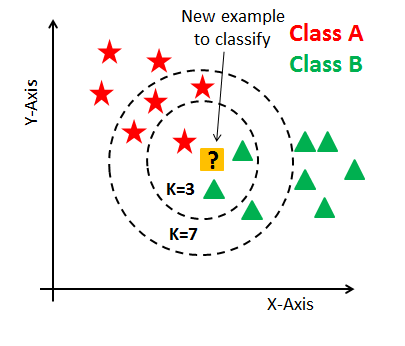

In [ ]:
import numpy as np
from collections import Counter 

class KNN:
    def __init__(self, k:int):
        self.k = k
        self.mu = None
        self.sigma = None
        self.X_input_normalized = None
        self.y = None

    def fit(self, X: np.array, y: np.array) -> None:
        self.mu = X.mean(axis = 0)
        self.sigma = X.std(axis = 0)
        self.y = y  # leaving 'y' as is
        
        # normalizing the input point:
        self.X_input_normalized = self.transform(X)
    
    def transform(self, X: np.array) -> np.array:
        return (X - self.mu[np.newaxis, :]) / self.sigma[np.newaxis, :]

    def predict(self, X) -> list:
        # normalizing the input point:
        X_input_normalized = self.transform(X)

        # calculating the Euclidean distance to all the data points:
        distances_array = np.sqrt(((self.X_input_normalized - X_input_normalized[:, np.newaxis]) ** 2).sum(axis=2))

        # choosing k nearest neighbors by sorting the array first:
        nearest_neighbors = np.argsort(distances_array)[:, :self.k]

        # determining the classes to which the neighbors belong
        neighbor_classes = self.y[nearest_neighbors]

        # counting the number of neighbors that belong to each class:
        class_counts = np.apply_along_axis(lambda x: Counter(x).most_common(1)[0][0], axis=1, arr=neighbor_classes)

        return class_counts

In [ ]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [ ]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [47]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anastasiialapshina","key":"49b450ca7963218ea265f266e74b0dc2"}'}

In [49]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/

!kaggle datasets download -d shivam2503/diamonds

mkdir: cannot create directory ‘/root/.kaggle’: File exists
diamonds.zip: Skipping, found more recently modified local copy (use --force to force download)


In [50]:
!unzip diamonds.zip

Archive:  diamonds.zip
replace diamonds.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: diamonds.csv            


In [92]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [93]:
data.isnull().values.any() 
# output: False -> no missing values found

False

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [94]:
# Столбец 'Unnamed: 0' повторно нумерует все алмазы, начиная с 1. Его можно опустить, так как нумерация уже присутствует.

data.drop(['Unnamed: 0'], axis = 1, inplace = True)
data.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

          carat     depth     table         x         y         z     price
carat  1.000000  0.028224  0.181618  0.975094  0.951722  0.953387  0.921591
depth  0.028224  1.000000 -0.295779 -0.025289 -0.029341  0.094924 -0.010647
table  0.181618 -0.295779  1.000000  0.195344  0.183760  0.150929  0.127134
x      0.975094 -0.025289  0.195344  1.000000  0.974701  0.970772  0.884435
y      0.951722 -0.029341  0.183760  0.974701  1.000000  0.952006  0.865421
z      0.953387  0.094924  0.150929  0.970772  0.952006  1.000000  0.861249
price  0.921591 -0.010647  0.127134  0.884435  0.865421  0.861249  1.000000


<Axes: >

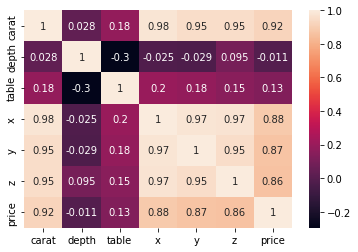

In [95]:
import seaborn as sns

# selecting numerical (real-valued - вещественные) features:
selected_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

# creating a correlation matrix:
correlation_matrix = data[selected_features + ['price']].corr()
print(correlation_matrix)

# or we can print out a heatmap:
sns.heatmap(correlation_matrix, annot = True)

# выведенная матрица показывается, что наиболее коррелирующими с целевой переменной признаками
# являются: 'carat' и 'x' (длина бриллианта)

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [96]:
data = pd.get_dummies(data, columns = ['cut', 'color', 'clarity'], drop_first = True)
data.head(3)

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [139]:
X = data.drop(['price'], axis = 1)
y = data['price']

np.random.seed(25) # fixating random seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25) # splitting the data

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [140]:
from sklearn.preprocessing import StandardScaler

# creating an instance of a Scaler:
scaler = StandardScaler()

# specifying numerical features in the data frame:
numerical_columns = ['carat', 'table', 'depth', 'x', 'y', 'z']

# scaling these specific columns:
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

X_train.head(3)

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
47448,-0.561447,0.382786,-0.654750,-0.522436,-0.487698,-0.467284,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
21124,0.792243,-0.386226,-0.654750,0.933324,0.979703,0.914893,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
33892,-1.047929,0.592517,-1.550409,-1.263713,-1.265071,-1.215964,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [141]:
from sklearn.linear_model import LinearRegression

# function for calculating Mean Square Error:
def MSE(y_test: np.array, y_prediction: np.array) -> np.float64:
  return ((y_test - y_prediction) ** 2).mean()

# creating and fitting a model:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# predicting train and test values of the target variable:
y_predicted_train = linear_regressor.predict(X_train)
y_predicted_test = linear_regressor.predict(X_test)

error_train = MSE(y_train, y_predicted_train)
error_test = MSE(y_test, y_predicted_test)

print(f'MSE on the train set is equal to: {error_train}')
print(f'MSE on the test set is equal to: {error_test}')

# Большое значение MSE как на тренировочном, так и тестовом сетах, может быть объяснена
# существованием 'outliers' бриллиантов с высокой стоимостью (доходящей до $18000), которая сильно аффектит значение MSE.

MSE on the train set is equal to: 1292816.64828912
MSE on the test set is equal to: 1240655.363433117


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [142]:
coefficients = linear_regressor.coef_
print(coefficients)

# 'carat' имеет самый большой коэффициент, влияющий на оценку target variable 'price'. Здесь также можно отметить,
# что 'clarity' имеет значительно высокие значения коэффициентов, но это НЕ вещественная переменная и мы кодировали её прежде. 

[ 5295.58071623   -82.25950133   -60.74116789 -1018.49080091
    26.75109241  -132.14980491   583.04357705   840.97297047
   769.6995766    747.35256129  -216.33145455  -277.62175429
  -496.69459155  -996.38653275 -1471.62226247 -2402.11889339
  5330.79719708  3625.85351687  2655.05340265  4552.65119621
  4228.3889219   4984.47326184  4918.44847453]


**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [143]:
from sklearn.linear_model import Lasso, Ridge

lasso_regressor = Lasso(alpha=10)
ridge_regressor = Ridge(alpha=10)

# fitting the models:
lasso_regressor.fit(X_train, y_train)
ridge_regressor.fit(X_train, y_train)

# making predictions on training and test sets and measuring the quality:
training_quality_lasso = lasso_regressor.score(X_train, y_train)
test_quality_lasso = lasso_regressor.score(X_test, y_test)

training_quality_ridge = ridge_regressor.score(X_train, y_train)
test_quality_ridge = ridge_regressor.score(X_test, y_test)

# printing out the results:
print(f'The quality of the lasso regressor on the training data is: {training_quality_lasso}')
print(f'The quality of the lasso regressor on the test data is: {test_quality_lasso}')

print(f'The quality of the ridge regressor on the training data is: {training_quality_ridge}')
print(f'The quality of the ridge regressor on the test data is: {test_quality_ridge}', '\n')

# checking out the weights (coefficients):
coefficients_lasso = lasso_regressor.coef_
coefficients_ridge = ridge_regressor.coef_

print(coefficients_lasso, '\n')
print(coefficients_ridge)

# Вывод: веса, действительно, стали меньше. То, насколько они будут меняться, зависит от величины гиперпараметра alpha,
# который мы далее будем подбирать в следующем задании. Таким образом, мультиколлинеарность очень сильно
# проявлялась в изначальной модели, поскольку существуют определенные переменные, сильно коррелирующие с другими.
# Это приводит к тому, что значения одних коэффициентов значительно зависят от других, что особо сильно и наблюдалось
# в исходной модели.

The quality of the lasso regressor on the training data is: 0.9038440016242509
The quality of the lasso regressor on the test data is: 0.908134177084621
The quality of the ridge regressor on the training data is: 0.9180588097444721
The quality of the ridge regressor on the test data is: 0.9226734713263539 

[ 4738.98080835  -150.62757719  -110.53071398  -614.60487958
    -0.           -79.45479416    -0.           163.24114041
    80.06049163    98.90627434     0.            -0.
  -129.83985687  -622.72398073 -1007.68802011 -1811.4882792
  1337.75942648     0.          -811.98985526   837.06471327
   581.32376361  1175.78137783  1175.21598082] 

[ 5246.00393142   -85.4468387    -63.87272459  -978.65801785
    27.68323631  -135.7468771    609.23341289   869.82967381
   796.14575591   778.83981528  -203.49951468  -264.85397128
  -478.81835613  -979.38523576 -1447.44601153 -2365.71993789
  4741.0972794   3080.40926628  2117.69745883  3998.30740883
  3679.52366137  4416.4436425   4357.7390

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

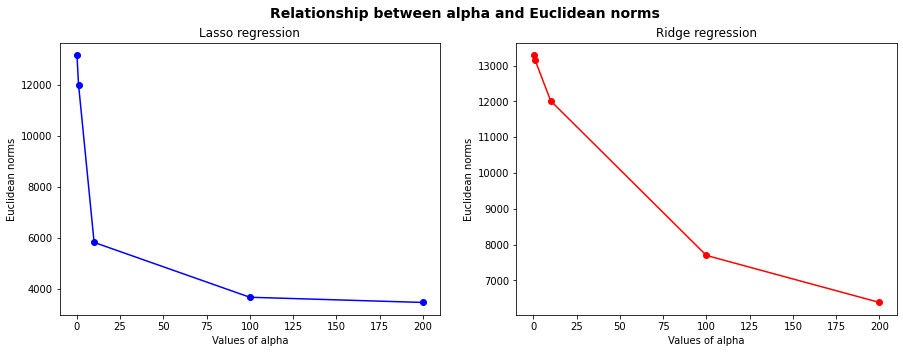

In [144]:
from numpy import linalg as LA
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

alpha_parameters = [0.1, 1, 10, 100, 200]
lasso_regression_models = []
ridge_regression_models = []

euclidean_norm_lasso = []
euclidean_norm_ridge = []

# working with Lasso and Ridge regressors:
for alpha in alpha_parameters:
  lasso_regressor = Lasso(alpha=alpha, max_iter=10000) # I increased the number of iterations because I kept getting a warning
  lasso_regressor.fit(X_train, y_train)
  lasso_regression_models.append(lasso_regressor)

  ridge_regressor = Ridge(alpha=alpha, max_iter=10000)
  ridge_regressor.fit(X_train, y_train)
  ridge_regression_models.append(ridge_regressor)

# calculating Euclidean norm of weights:
for model in lasso_regression_models:
  euclidean_norm = LA.norm(model.coef_)
  euclidean_norm_lasso.append(euclidean_norm)

for model in ridge_regression_models:
  euclidean_norm = LA.norm(model.coef_)
  euclidean_norm_ridge.append(euclidean_norm)

# visualizing the relationship between alphas and calculated Euclidean norms:
fig = plt.figure(figsize=(15, 5))
fig.suptitle('Relationship between alpha and Euclidean norms', fontsize=14, fontweight='bold')

ax0 = fig.add_subplot(1, 2, 1)
ax0.plot(alpha_parameters, euclidean_norm_lasso, color='blue', marker='o')
ax0.set_title('Lasso regression')
ax0.set_xlabel('Values of alpha')
ax0.set_ylabel('Euclidean norms')

ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(alpha_parameters, euclidean_norm_ridge, color='red', marker='o')
ax1.set_title('Ridge regression')
ax1.set_xlabel('Values of alpha')
ax1.set_ylabel('Euclidean norms')

plt.show()

# Лассо регрессия агрессивнее уменьшает веса. Кроме того, коэффициенты для некоторых признаков будут зануляться,
# что приводит к отбору наиболее релевантных, влияющих на целевую переменную признаков, игнорируя несущественные признаки.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [145]:
from sklearn.linear_model import LassoCV

# initializing our lassoCV:
lasso = LassoCV(cv = 5, alphas=alpha_parameters, max_iter = 10000) # increased the number of iterations again
lasso.fit(X_train, y_train)

# checking the order of alphas:
alphas_df = pd.DataFrame({'Values of alpha': lasso.alphas_})
alphas_df.index += 1

# getting the matrix and averages of each row
matrix_mse = lasso.mse_path_
average_MSE = matrix_mse.mean(axis = 1)
alphas_df['Average MSE'] = average_MSE
alphas_df

# Анализируя полученый дата фрейм, приходим к выводу, что наилучшее значение alpha: 1.0,
# поскольку среднее значение MSE на кросс-валидации для такого значения параметра alpha наименьшее.

,Values of alpha,Average MSE
1,200.0,2.468400e+06
2,100.0,2.252483e+06
3,10.0,1.525026e+06
4,1.0,1.305202e+06
5,0.1,1.355996e+06


**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [152]:
# training the model with the finalized parameter:
lasso_model = Lasso(alpha = 1.0, max_iter = 10000)
lasso_model.fit(X_train, y_train)

# getting the coefficients:
coeff = lasso_model.coef_
coefficient_features = pd.DataFrame({'Features': X_train.columns, 'Coefficients': coeff})
coefficient_features

# Если обучать модель при значении гиперпараметра alpha = 1, видим, что значение коэффициента
# данного признака наибольшее -> это самый информативный признак. В то же время, признак 'y' оказался 
# наименее информативным - значение его коэффициента занулилось. Кроме того, видно, что 'clarity' также вносит весомый
# вклад в оценку финальной стоимости бриллианта.

,Features,Coefficients
0,carat,5239.592548
1,depth,-94.575840
2,table,-67.435883
3,x,-975.007019
4,y,0.000000
5,z,-107.486565
6,cut_Good,484.557768
7,cut_Ideal,743.564681
8,cut_Premium,671.941956
9,cut_Very Good,655.286018


**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [153]:
prediction_lasso = lasso_model.predict(X_test)
MSE_lasso = MSE(y_test, prediction_lasso)

print(f'The MSE for linear regression is: {error_test}')
print(f'The MSE for lasso is: {MSE_lasso}')

# На основе полученных результатов сложно сделать вывод о том, какую модель лучше
# использовать для предсказаний, поскольку значения MSE очень близки по их абсолютному значению.
# Предположу, что Lasso-регрессия должна была показать лучшие результаты, поскольку такая
# модель избавилась/уменьшила влияние несущественный признаков. Однако полученные результаты немного отличаются
# от данного прогноза.

The MSE for linear regression is: 1240655.363433117
The MSE for lasso is: 1245918.6153246367
